In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("teste.csv")

In [3]:
df['Name_atv'] = df['Name'].apply(lambda x: x.split("_")[1].split(".")[0])
df['Name_Subject'] = df['Name'].apply(lambda x: x.split("_")[0]	)

In [4]:
df.head(10)

,Name,#Ephocs,Power,Name_atv,Name_Subject
0,001_BL01.set,1,2.516656,BL01,001
1,001_BL02.set,1,2.648499,BL02,001
2,001_BL03.set,1,-3.448016,BL03,001
3,001_BL04.set,1,-1.914454,BL04,001
4,001_IBOE.set,1,-1.281348,IBOE,001
5,002_BL01.set,1,-2.795607,BL01,002
6,002_BL02.set,1,-2.234730,BL02,002
7,002_BL03.set,1,-2.811364,BL03,002
8,002_BL04.set,1,-2.102746,BL04,002
9,002_IBOE.set,1,3.264236,IBOE,002


In [5]:
# Criar um dicionário com os valores de Power onde Name_atv é "IBOE"
iboe_power = df[df['Name_atv'] == 'IBOE'].set_index('Name_Subject')['Power'].to_dict()

# Adicionar a coluna IBOE_power ao DataFrame
df['IBOE_power'] = df['Name_Subject'].map(iboe_power)

In [6]:
# Adicionar a coluna IBOE_power ao DataFrame
df['Dif'] = df['IBOE_power'] - df['Power']

In [7]:
df.head(10)

,Name,#Ephocs,Power,Name_atv,Name_Subject,IBOE_power,Dif
0,001_BL01.set,1,2.516656,BL01,001,-1.281348,-3.798004
1,001_BL02.set,1,2.648499,BL02,001,-1.281348,-3.929847
2,001_BL03.set,1,-3.448016,BL03,001,-1.281348,2.166668
3,001_BL04.set,1,-1.914454,BL04,001,-1.281348,0.633106
4,001_IBOE.set,1,-1.281348,IBOE,001,-1.281348,0.000000
5,002_BL01.set,1,-2.795607,BL01,002,3.264236,6.059843
6,002_BL02.set,1,-2.234730,BL02,002,3.264236,5.498966
7,002_BL03.set,1,-2.811364,BL03,002,3.264236,6.075600
8,002_BL04.set,1,-2.102746,BL04,002,3.264236,5.366982
9,002_IBOE.set,1,3.264236,IBOE,002,3.264236,0.000000


In [8]:
df_plot = df.query("Name_atv!='IBOE'")[["Name_Subject","Name_atv","Dif"]]

In [9]:
df_plot

,Name_Subject,Name_atv,Dif
0,001,BL01,-3.798004
1,001,BL02,-3.929847
2,001,BL03,2.166668
3,001,BL04,0.633106
5,002,BL01,6.059843
6,002,BL02,5.498966
7,002,BL03,6.075600
8,002,BL04,5.366982
10,003,BL01,2.582436
11,003,BL02,2.986723


In [10]:
df_plot.query("Name_atv == 'BL01'")

,Name_Subject,Name_atv,Dif
0,001,BL01,-3.798004
5,002,BL01,6.059843
10,003,BL01,2.582436
15,004,BL01,4.508273
20,005,BL01,-1.446840
25,006,BL01,0.298265
30,007,BL01,2.279972


<Figure size 1000x600 with 0 Axes>

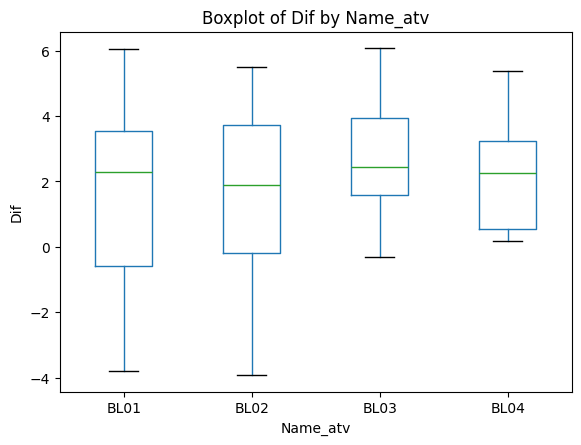

In [11]:
# Gerar boxplots para cada grupo Name_atv
plt.figure(figsize=(10, 6))
df_plot.boxplot(column='Dif', by='Name_atv', grid=False)
plt.title('Boxplot of Dif by Name_atv')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by Name_atv' title
plt.xlabel('Name_atv')
plt.ylabel('Dif')
plt.show()

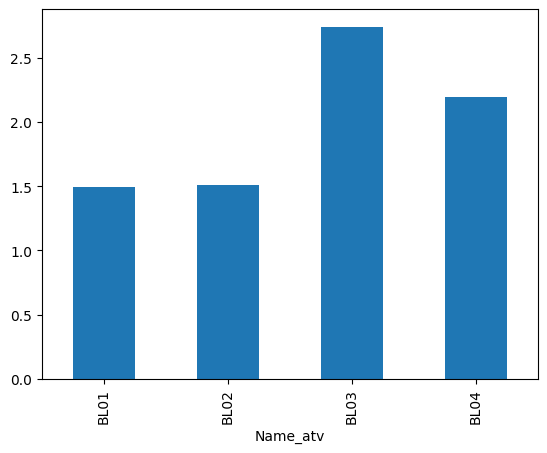

In [12]:
df_plot.groupby("Name_atv")["Dif"].agg('mean').plot(kind="bar")
plt.show()